# EV charging Data Analysis

Site name - Urban Science Building (USB), Newcastle University

Import necessary libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Collection:

The data is retreived from Fastned and Newcastle University.


In [3]:
sessions_data = pd.read_csv("../data/usb_ev_data/session.csv")

In [4]:
sessions_data.head()

,id,sessionStart,sessionStop,connectorType,kwh,authType,authId,chargerId,locationId
0,1ff7bb21-86f6-4a58-9713-63c9551b0dc3,2021-03-18 17:39:36,2021-03-18 17:59:06,IEC_62196_T2_COMBO,9509,CUSTOMER,1062232,5000198,50112
1,4ec4bf07-f359-4199-93d3-ec842a450cfa,2021-03-18 19:00:16,2021-03-18 19:33:43,CHADEMO,6566,CUSTOMER,1056758,5000194,50112
2,63ef2126-e813-4225-982d-fcd89108f2ba,2021-03-18 20:43:25,2021-03-18 21:07:50,CHADEMO,13882,CUSTOMER,1076569,5000197,50112
3,707dbb44-cb45-4cea-ab86-dec7c06d6a43,2021-03-18 21:23:07,2021-03-18 21:47:35,IEC_62196_T2_COMBO,18428,CUSTOMER,1073736,5000198,50112
4,55a243f9-6c3a-4a53-a964-fc7f3d88ddb7,2021-03-18 22:24:24,2021-03-18 23:09:28,CHADEMO,12836,CUSTOMER,1073736,5000197,50112


The data represents the record of charging sessions over a period of 4 years from March 2021 to June 2024.
The initial rows of the data are shown above. The columns of this data represent:

- _id_ - Id of each session
- _sessionStart_ - The date and time of the start of a charging session.
- _sessionStop_ - The date and time of the end of a charging session.
- _connectorType_ - The type of connector the car was connected during the session
- _kwh_ - The energy delivered during each session.
- _authType_ - The mode of authentication/payment used for charging.
- _authId_ - The authentication Id.
- _chargerId_ - The Id of the Charger.
- _locationId_ - The Id of the location of the charger which is the same for all.

Among these columns, Location Id is irrelavant to our analysis as it is same for all. Hence, those columns will be dropped from the data.

## 2. Data Preparation:

In [5]:
usb_data = sessions_data.drop(columns={'locationId'})

In [6]:
usb_data.head()

,id,sessionStart,sessionStop,connectorType,kwh,authType,authId,chargerId
0,1ff7bb21-86f6-4a58-9713-63c9551b0dc3,2021-03-18 17:39:36,2021-03-18 17:59:06,IEC_62196_T2_COMBO,9509,CUSTOMER,1062232,5000198
1,4ec4bf07-f359-4199-93d3-ec842a450cfa,2021-03-18 19:00:16,2021-03-18 19:33:43,CHADEMO,6566,CUSTOMER,1056758,5000194
2,63ef2126-e813-4225-982d-fcd89108f2ba,2021-03-18 20:43:25,2021-03-18 21:07:50,CHADEMO,13882,CUSTOMER,1076569,5000197
3,707dbb44-cb45-4cea-ab86-dec7c06d6a43,2021-03-18 21:23:07,2021-03-18 21:47:35,IEC_62196_T2_COMBO,18428,CUSTOMER,1073736,5000198
4,55a243f9-6c3a-4a53-a964-fc7f3d88ddb7,2021-03-18 22:24:24,2021-03-18 23:09:28,CHADEMO,12836,CUSTOMER,1073736,5000197


Now, the kwh column will be renamed for better understanding and divided by 1000 to make it actually kWh which was just Wh (verified with the data owner.)

In [7]:
usb_data.rename(columns={'kwh' : 'energy_consumed_kWh'}, inplace=True)

In [8]:
usb_data['energy_consumed_kWh'] = usb_data['energy_consumed_kWh'] / 1000

In [9]:
usb_data.head()

,id,sessionStart,sessionStop,connectorType,energy_consumed_kWh,authType,authId,chargerId
0,1ff7bb21-86f6-4a58-9713-63c9551b0dc3,2021-03-18 17:39:36,2021-03-18 17:59:06,IEC_62196_T2_COMBO,9.509,CUSTOMER,1062232,5000198
1,4ec4bf07-f359-4199-93d3-ec842a450cfa,2021-03-18 19:00:16,2021-03-18 19:33:43,CHADEMO,6.566,CUSTOMER,1056758,5000194
2,63ef2126-e813-4225-982d-fcd89108f2ba,2021-03-18 20:43:25,2021-03-18 21:07:50,CHADEMO,13.882,CUSTOMER,1076569,5000197
3,707dbb44-cb45-4cea-ab86-dec7c06d6a43,2021-03-18 21:23:07,2021-03-18 21:47:35,IEC_62196_T2_COMBO,18.428,CUSTOMER,1073736,5000198
4,55a243f9-6c3a-4a53-a964-fc7f3d88ddb7,2021-03-18 22:24:24,2021-03-18 23:09:28,CHADEMO,12.836,CUSTOMER,1073736,5000197


Now the columns will be reordered to place all types of IDs at the start along with the authType to make the data more sensible.

In [10]:
usb_data = usb_data.iloc[:, [0, 6, 7, 5, 1, 2, 3, 4]]

In [11]:
usb_data.head()

,id,authId,chargerId,authType,sessionStart,sessionStop,connectorType,energy_consumed_kWh
0,1ff7bb21-86f6-4a58-9713-63c9551b0dc3,1062232,5000198,CUSTOMER,2021-03-18 17:39:36,2021-03-18 17:59:06,IEC_62196_T2_COMBO,9.509
1,4ec4bf07-f359-4199-93d3-ec842a450cfa,1056758,5000194,CUSTOMER,2021-03-18 19:00:16,2021-03-18 19:33:43,CHADEMO,6.566
2,63ef2126-e813-4225-982d-fcd89108f2ba,1076569,5000197,CUSTOMER,2021-03-18 20:43:25,2021-03-18 21:07:50,CHADEMO,13.882
3,707dbb44-cb45-4cea-ab86-dec7c06d6a43,1073736,5000198,CUSTOMER,2021-03-18 21:23:07,2021-03-18 21:47:35,IEC_62196_T2_COMBO,18.428
4,55a243f9-6c3a-4a53-a964-fc7f3d88ddb7,1073736,5000197,CUSTOMER,2021-03-18 22:24:24,2021-03-18 23:09:28,CHADEMO,12.836


In [12]:
usb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34432 entries, 0 to 34431
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   34432 non-null  object 
 1   authId               34432 non-null  int64  
 2   chargerId            34432 non-null  int64  
 3   authType             34432 non-null  object 
 4   sessionStart         34432 non-null  object 
 5   sessionStop          34432 non-null  object 
 6   connectorType        34432 non-null  object 
 7   energy_consumed_kWh  34432 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 2.1+ MB


Now let's convert the date and time from general object to date-time object to ensure it is in right format.

In [13]:
usb_data['sessionStart'] = pd.to_datetime(usb_data['sessionStart'])
usb_data['sessionStop'] = pd.to_datetime(usb_data['sessionStop'])

In [14]:
usb_data.head()

,id,authId,chargerId,authType,sessionStart,sessionStop,connectorType,energy_consumed_kWh
0,1ff7bb21-86f6-4a58-9713-63c9551b0dc3,1062232,5000198,CUSTOMER,2021-03-18 17:39:36,2021-03-18 17:59:06,IEC_62196_T2_COMBO,9.509
1,4ec4bf07-f359-4199-93d3-ec842a450cfa,1056758,5000194,CUSTOMER,2021-03-18 19:00:16,2021-03-18 19:33:43,CHADEMO,6.566
2,63ef2126-e813-4225-982d-fcd89108f2ba,1076569,5000197,CUSTOMER,2021-03-18 20:43:25,2021-03-18 21:07:50,CHADEMO,13.882
3,707dbb44-cb45-4cea-ab86-dec7c06d6a43,1073736,5000198,CUSTOMER,2021-03-18 21:23:07,2021-03-18 21:47:35,IEC_62196_T2_COMBO,18.428
4,55a243f9-6c3a-4a53-a964-fc7f3d88ddb7,1073736,5000197,CUSTOMER,2021-03-18 22:24:24,2021-03-18 23:09:28,CHADEMO,12.836


Now lets rename the connectorType according to FastNed

In [15]:
usb_data['connectorType'].replace('IEC_62196_T2_COMBO', 'CCS', inplace=True)
usb_data['connectorType'].replace('IEC_62196_T2', 'AC', inplace=True)

### 2.1 Data Cleaning:

As the data is perfectly ordered and in right format, now it will undergo some cleaning which will include removing of null or invalid values of kWh. 

In [16]:
usb_data.isnull().sum()

id                     0
authId                 0
chargerId              0
authType               0
sessionStart           0
sessionStop            0
connectorType          0
energy_consumed_kWh    0
dtype: int64

There are no null values. Now lets check the central tendencies to identify the range of data

In [17]:
usb_data.describe()

,authId,chargerId,sessionStart,sessionStop,energy_consumed_kWh
count,3.443200e+04,3.443200e+04,34432,34432,34432.000000
mean,9.813461e+06,5.000197e+06,2023-02-26 13:34:31.355221504,2023-02-26 14:15:36.739428608,26.604024
min,1.130000e+02,5.000194e+06,2021-03-18 17:39:36,2021-03-18 17:59:06,0.000000
25%,1.110206e+06,5.000195e+06,2022-07-02 09:01:58.249999872,2022-07-02 09:54:15.750000128,10.188750
50%,1.211702e+06,5.000197e+06,2023-04-03 14:13:03,2023-04-03 14:48:26.500000,23.467000
75%,4.178835e+06,5.000198e+06,2023-11-26 00:54:11.249999872,2023-11-26 01:07:52.500000,40.150000
max,1.572480e+08,5.000199e+06,2024-07-01 15:20:10,2024-07-01 15:52:45,110.733000
std,1.986829e+07,1.762099e+00,NaN,NaN,19.522729


As it can be seen, the least energy consumed is zero. It is significant to identify how many zero values are there in the data.

In [18]:
usb_data[usb_data['energy_consumed_kWh'] == 0]['energy_consumed_kWh'].count()

577

Now the new data will have sessions which have consumed energy more than 5 kWh.

In [19]:
usb_data_filtered = usb_data[usb_data['energy_consumed_kWh'] > 5]

In [20]:
usb_data_filtered.describe()

,authId,chargerId,sessionStart,sessionStop,energy_consumed_kWh
count,2.977400e+04,2.977400e+04,29774,29774,29774.000000
mean,1.032042e+07,5.000197e+06,2023-02-21 11:12:57.897427200,2023-02-21 11:57:27.335460608,30.441438
min,1.130000e+02,5.000194e+06,2021-03-18 17:39:36,2021-03-18 17:59:06,5.002000
25%,1.110689e+06,5.000195e+06,2022-06-27 05:31:01,2022-06-27 06:12:22,14.908500
50%,1.208763e+06,5.000197e+06,2023-03-22 10:27:46,2023-03-22 11:28:56.500000,27.405500
75%,6.469794e+06,5.000199e+06,2023-11-23 15:31:31.750000128,2023-11-23 15:55:35.249999872,42.911500
max,1.572480e+08,5.000199e+06,2024-07-01 15:20:10,2024-07-01 15:52:45,110.733000
std,2.037021e+07,1.745373e+00,NaN,NaN,18.207093


Now let's calculate the duration of each charging session:

In [21]:
usb_data_filtered['duration(hrs)'] = ((usb_data_filtered['sessionStop'] - usb_data_filtered['sessionStart']).dt.total_seconds()) / 3600
usb_data_filtered['duration(mins)'] = ((usb_data_filtered['sessionStop'] - usb_data_filtered['sessionStart']).dt.total_seconds()) / 60

C:\Users\Kaustubh\AppData\Local\Temp\ipykernel_2840\619619653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usb_data_filtered['duration(hrs)'] = ((usb_data_filtered['sessionStop'] - usb_data_filtered['sessionStart']).dt.total_seconds()) / 3600
C:\Users\Kaustubh\AppData\Local\Temp\ipykernel_2840\619619653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usb_data_filtered['duration(mins)'] = ((usb_data_filtered['sessionStop'] - usb_data_filtered['sessionStart']).dt.total_seconds()) / 60


In [22]:
usb_data_filtered.head()

,id,authId,chargerId,authType,sessionStart,sessionStop,connectorType,energy_consumed_kWh,duration(hrs),duration(mins)
0,1ff7bb21-86f6-4a58-9713-63c9551b0dc3,1062232,5000198,CUSTOMER,2021-03-18 17:39:36,2021-03-18 17:59:06,CCS,9.509,0.325000,19.500000
1,4ec4bf07-f359-4199-93d3-ec842a450cfa,1056758,5000194,CUSTOMER,2021-03-18 19:00:16,2021-03-18 19:33:43,CHADEMO,6.566,0.557500,33.450000
2,63ef2126-e813-4225-982d-fcd89108f2ba,1076569,5000197,CUSTOMER,2021-03-18 20:43:25,2021-03-18 21:07:50,CHADEMO,13.882,0.406944,24.416667
3,707dbb44-cb45-4cea-ab86-dec7c06d6a43,1073736,5000198,CUSTOMER,2021-03-18 21:23:07,2021-03-18 21:47:35,CCS,18.428,0.407778,24.466667
4,55a243f9-6c3a-4a53-a964-fc7f3d88ddb7,1073736,5000197,CUSTOMER,2021-03-18 22:24:24,2021-03-18 23:09:28,CHADEMO,12.836,0.751111,45.066667


Now we have the duration in hours and in minutes as well. Let's check the statistics.

In [23]:
usb_data_filtered.describe()

,authId,chargerId,sessionStart,sessionStop,energy_consumed_kWh,duration(hrs),duration(mins)
count,2.977400e+04,2.977400e+04,29774,29774,29774.000000,29774.000000,29774.000000
mean,1.032042e+07,5.000197e+06,2023-02-21 11:12:57.897427200,2023-02-21 11:57:27.335460608,30.441438,0.741511,44.490634
min,1.130000e+02,5.000194e+06,2021-03-18 17:39:36,2021-03-18 17:59:06,5.002000,0.035833,2.150000
25%,1.110689e+06,5.000195e+06,2022-06-27 05:31:01,2022-06-27 06:12:22,14.908500,0.416667,25.000000
50%,1.208763e+06,5.000197e+06,2023-03-22 10:27:46,2023-03-22 11:28:56.500000,27.405500,0.644167,38.650000
75%,6.469794e+06,5.000199e+06,2023-11-23 15:31:31.750000128,2023-11-23 15:55:35.249999872,42.911500,0.950000,57.000000
max,1.572480e+08,5.000199e+06,2024-07-01 15:20:10,2024-07-01 15:52:45,110.733000,12.570278,754.216667
std,2.037021e+07,1.745373e+00,NaN,NaN,18.207093,0.486146,29.168738


### 2.2 Time-based Utilisation Rate:

The time based utilisation rate is the percentage of duration against 24 hr period the car occupied the charger.

- time_based_util_rate = (duration(hrs) / 24) * 100

In [24]:
usb_data_filtered['time_util_rate'] = (usb_data_filtered['duration(hrs)'] / 24) * 100

C:\Users\Kaustubh\AppData\Local\Temp\ipykernel_2840\900781561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usb_data_filtered['time_util_rate'] = (usb_data_filtered['duration(hrs)'] / 24) * 100


In [25]:
usb_data_filtered.head()

,id,authId,chargerId,authType,sessionStart,sessionStop,connectorType,energy_consumed_kWh,duration(hrs),duration(mins),time_util_rate
0,1ff7bb21-86f6-4a58-9713-63c9551b0dc3,1062232,5000198,CUSTOMER,2021-03-18 17:39:36,2021-03-18 17:59:06,CCS,9.509,0.325000,19.500000,1.354167
1,4ec4bf07-f359-4199-93d3-ec842a450cfa,1056758,5000194,CUSTOMER,2021-03-18 19:00:16,2021-03-18 19:33:43,CHADEMO,6.566,0.557500,33.450000,2.322917
2,63ef2126-e813-4225-982d-fcd89108f2ba,1076569,5000197,CUSTOMER,2021-03-18 20:43:25,2021-03-18 21:07:50,CHADEMO,13.882,0.406944,24.416667,1.695602
3,707dbb44-cb45-4cea-ab86-dec7c06d6a43,1073736,5000198,CUSTOMER,2021-03-18 21:23:07,2021-03-18 21:47:35,CCS,18.428,0.407778,24.466667,1.699074
4,55a243f9-6c3a-4a53-a964-fc7f3d88ddb7,1073736,5000197,CUSTOMER,2021-03-18 22:24:24,2021-03-18 23:09:28,CHADEMO,12.836,0.751111,45.066667,3.129630


### 2.3 Power allocation:

The chargers have their charger IDs but they don't have power levels allocated.

- According to ZapMap and FastNed, 
    - Charger ID - 5000194, 5000195, 5000196, 5000197 each have
        - connectorType CCS with power level of 50kW, CHADEMO with power level of 50kW, AC with 38kW
    - Charger ID - 5000198, 5000199 each have
        - connector type CCS with power level of 175kW
        
Let's allocate the power levels.

In [26]:
power_levels = {
    (5000194, "CCS"): 50,
    (5000194, "CHADEMO"): 50,
    (5000194, "AC"): 38,
    (5000195, "CCS"): 50,
    (5000195, "CHADEMO"): 50,
    (5000195, "AC"): 38,
    (5000196, "CCS"): 50,
    (5000196, "CHADEMO"): 50,
    (5000196, "AC"): 38,
    (5000197, "CCS"): 50,
    (5000197, "CHADEMO"): 50,
    (5000197, "AC"): 38,
    (5000198, "CCS"): 175,
    (5000199, "CCS"): 175,
}

In [27]:
usb_data_filtered['power_upto_kW'] = usb_data_filtered.apply(lambda row: power_levels.get((row['chargerId'], row['connectorType']), None), axis=1)


C:\Users\Kaustubh\AppData\Local\Temp\ipykernel_2840\148400263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usb_data_filtered['power_upto_kW'] = usb_data_filtered.apply(lambda row: power_levels.get((row['chargerId'], row['connectorType']), None), axis=1)


In [28]:
usb_data_filtered.head(20)

,id,authId,chargerId,authType,sessionStart,sessionStop,connectorType,energy_consumed_kWh,duration(hrs),duration(mins),time_util_rate,power_upto_kW
0,1ff7bb21-86f6-4a58-9713-63c9551b0dc3,1062232,5000198,CUSTOMER,2021-03-18 17:39:36,2021-03-18 17:59:06,CCS,9.509,0.325000,19.500000,1.354167,175
1,4ec4bf07-f359-4199-93d3-ec842a450cfa,1056758,5000194,CUSTOMER,2021-03-18 19:00:16,2021-03-18 19:33:43,CHADEMO,6.566,0.557500,33.450000,2.322917,50
2,63ef2126-e813-4225-982d-fcd89108f2ba,1076569,5000197,CUSTOMER,2021-03-18 20:43:25,2021-03-18 21:07:50,CHADEMO,13.882,0.406944,24.416667,1.695602,50
3,707dbb44-cb45-4cea-ab86-dec7c06d6a43,1073736,5000198,CUSTOMER,2021-03-18 21:23:07,2021-03-18 21:47:35,CCS,18.428,0.407778,24.466667,1.699074,175
4,55a243f9-6c3a-4a53-a964-fc7f3d88ddb7,1073736,5000197,CUSTOMER,2021-03-18 22:24:24,2021-03-18 23:09:28,CHADEMO,12.836,0.751111,45.066667,3.129630,50
5,7044201b-713f-48cc-82a5-b2eaed96ca4d,1053468,5000194,CUSTOMER,2021-03-19 07:14:26,2021-03-19 07:54:07,CHADEMO,14.757,0.661389,39.683333,2.755787,50
6,ad121474-085d-4f7e-8edb-1f3045b3ddf5,1073736,5000194,CUSTOMER,2021-03-19 10:24:06,2021-03-19 10:51:40,CHADEMO,14.025,0.459444,27.566667,1.914352,50
7,6e54ee4e-fdaf-41ca-bf7c-2a1b86f19237,18605207,5000199,CHARGE_CARD,2021-03-19 10:29:46,2021-03-19 11:20:35,CCS,14.223,0.846944,50.816667,3.528935,175
8,669ff3c8-c05e-40bd-820e-a4bfccfa76cb,1073736,5000197,CUSTOMER,2021-03-19 11:14:29,2021-03-19 11:45:03,CHADEMO,12.169,0.509444,30.566667,2.122685,50
9,b4caeaef-bbe8-4ed1-8bbc-e8fb1bf29a39,1073736,5000199,CUSTOMER,2021-03-19 11:57:53,2021-03-19 12:28:38,CCS,13.226,0.512500,30.750000,2.135417,175


### 2.4 Energy based Utilisation Rate:

As we have the power levels allocated to each session, now lets calculate the energy based utilisation rate where 

energy_util_rate = energy_consumed_kWh / (power_upto_kW * 24 hours)

In [29]:
usb_data_filtered['energy_util_rate'] = usb_data_filtered['energy_consumed_kWh'] / (usb_data_filtered['power_upto_kW'] * 24)

C:\Users\Kaustubh\AppData\Local\Temp\ipykernel_2840\3285899545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usb_data_filtered['energy_util_rate'] = usb_data_filtered['energy_consumed_kWh'] / (usb_data_filtered['power_upto_kW'] * 24)


In [30]:
usb_data_filtered.head()

,id,authId,chargerId,authType,sessionStart,sessionStop,connectorType,energy_consumed_kWh,duration(hrs),duration(mins),time_util_rate,power_upto_kW,energy_util_rate
0,1ff7bb21-86f6-4a58-9713-63c9551b0dc3,1062232,5000198,CUSTOMER,2021-03-18 17:39:36,2021-03-18 17:59:06,CCS,9.509,0.325000,19.500000,1.354167,175,0.002264
1,4ec4bf07-f359-4199-93d3-ec842a450cfa,1056758,5000194,CUSTOMER,2021-03-18 19:00:16,2021-03-18 19:33:43,CHADEMO,6.566,0.557500,33.450000,2.322917,50,0.005472
2,63ef2126-e813-4225-982d-fcd89108f2ba,1076569,5000197,CUSTOMER,2021-03-18 20:43:25,2021-03-18 21:07:50,CHADEMO,13.882,0.406944,24.416667,1.695602,50,0.011568
3,707dbb44-cb45-4cea-ab86-dec7c06d6a43,1073736,5000198,CUSTOMER,2021-03-18 21:23:07,2021-03-18 21:47:35,CCS,18.428,0.407778,24.466667,1.699074,175,0.004388
4,55a243f9-6c3a-4a53-a964-fc7f3d88ddb7,1073736,5000197,CUSTOMER,2021-03-18 22:24:24,2021-03-18 23:09:28,CHADEMO,12.836,0.751111,45.066667,3.129630,50,0.010697


In [31]:
usb_data_filtered.describe()

,authId,chargerId,sessionStart,sessionStop,energy_consumed_kWh,duration(hrs),duration(mins),time_util_rate,power_upto_kW,energy_util_rate
count,2.977400e+04,2.977400e+04,29774,29774,29774.000000,29774.000000,29774.000000,29774.000000,29774.000000,29774.000000
mean,1.032042e+07,5.000197e+06,2023-02-21 11:12:57.897427200,2023-02-21 11:57:27.335460608,30.441438,0.741511,44.490634,3.089627,109.715692,0.014965
min,1.130000e+02,5.000194e+06,2021-03-18 17:39:36,2021-03-18 17:59:06,5.002000,0.035833,2.150000,0.149306,38.000000,0.001192
25%,1.110689e+06,5.000195e+06,2022-06-27 05:31:01,2022-06-27 06:12:22,14.908500,0.416667,25.000000,1.736111,50.000000,0.006985
50%,1.208763e+06,5.000197e+06,2023-03-22 10:27:46,2023-03-22 11:28:56.500000,27.405500,0.644167,38.650000,2.684028,50.000000,0.011004
75%,6.469794e+06,5.000199e+06,2023-11-23 15:31:31.750000128,2023-11-23 15:55:35.249999872,42.911500,0.950000,57.000000,3.958333,175.000000,0.018434
max,1.572480e+08,5.000199e+06,2024-07-01 15:20:10,2024-07-01 15:52:45,110.733000,12.570278,754.216667,52.376157,175.000000,0.084964
std,2.037021e+07,1.745373e+00,NaN,NaN,18.207093,0.486146,29.168738,2.025607,62.912540,0.011847


In [32]:
usb_data_filtered['energy_util_rate_percent'] = usb_data_filtered['energy_util_rate'] * 100

C:\Users\Kaustubh\AppData\Local\Temp\ipykernel_2840\449203329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usb_data_filtered['energy_util_rate_percent'] = usb_data_filtered['energy_util_rate'] * 100


In [33]:
usb_data_filtered.head()

,id,authId,chargerId,authType,sessionStart,sessionStop,connectorType,energy_consumed_kWh,duration(hrs),duration(mins),time_util_rate,power_upto_kW,energy_util_rate,energy_util_rate_percent
0,1ff7bb21-86f6-4a58-9713-63c9551b0dc3,1062232,5000198,CUSTOMER,2021-03-18 17:39:36,2021-03-18 17:59:06,CCS,9.509,0.325000,19.500000,1.354167,175,0.002264,0.226405
1,4ec4bf07-f359-4199-93d3-ec842a450cfa,1056758,5000194,CUSTOMER,2021-03-18 19:00:16,2021-03-18 19:33:43,CHADEMO,6.566,0.557500,33.450000,2.322917,50,0.005472,0.547167
2,63ef2126-e813-4225-982d-fcd89108f2ba,1076569,5000197,CUSTOMER,2021-03-18 20:43:25,2021-03-18 21:07:50,CHADEMO,13.882,0.406944,24.416667,1.695602,50,0.011568,1.156833
3,707dbb44-cb45-4cea-ab86-dec7c06d6a43,1073736,5000198,CUSTOMER,2021-03-18 21:23:07,2021-03-18 21:47:35,CCS,18.428,0.407778,24.466667,1.699074,175,0.004388,0.438762
4,55a243f9-6c3a-4a53-a964-fc7f3d88ddb7,1073736,5000197,CUSTOMER,2021-03-18 22:24:24,2021-03-18 23:09:28,CHADEMO,12.836,0.751111,45.066667,3.129630,50,0.010697,1.069667


In [34]:
usb_data_filtered.describe()

,authId,chargerId,sessionStart,sessionStop,energy_consumed_kWh,duration(hrs),duration(mins),time_util_rate,power_upto_kW,energy_util_rate,energy_util_rate_percent
count,2.977400e+04,2.977400e+04,29774,29774,29774.000000,29774.000000,29774.000000,29774.000000,29774.000000,29774.000000,29774.000000
mean,1.032042e+07,5.000197e+06,2023-02-21 11:12:57.897427200,2023-02-21 11:57:27.335460608,30.441438,0.741511,44.490634,3.089627,109.715692,0.014965,1.496456
min,1.130000e+02,5.000194e+06,2021-03-18 17:39:36,2021-03-18 17:59:06,5.002000,0.035833,2.150000,0.149306,38.000000,0.001192,0.119190
25%,1.110689e+06,5.000195e+06,2022-06-27 05:31:01,2022-06-27 06:12:22,14.908500,0.416667,25.000000,1.736111,50.000000,0.006985,0.698452
50%,1.208763e+06,5.000197e+06,2023-03-22 10:27:46,2023-03-22 11:28:56.500000,27.405500,0.644167,38.650000,2.684028,50.000000,0.011004,1.100435
75%,6.469794e+06,5.000199e+06,2023-11-23 15:31:31.750000128,2023-11-23 15:55:35.249999872,42.911500,0.950000,57.000000,3.958333,175.000000,0.018434,1.843417
max,1.572480e+08,5.000199e+06,2024-07-01 15:20:10,2024-07-01 15:52:45,110.733000,12.570278,754.216667,52.376157,175.000000,0.084964,8.496382
std,2.037021e+07,1.745373e+00,NaN,NaN,18.207093,0.486146,29.168738,2.025607,62.912540,0.011847,1.184700


### 2.5 Amount calculation:

Now the energy utilisation rate and the energy utilisation rate percent is calculated. According to FastNed, this charger has a constant price of 69p per kWh. It is same for all types of chargers. Hence, the total amount spent will be calculated as : price * kWh of each session.


In [35]:
usb_data_filtered['amount_gbp'] = usb_data_filtered['energy_consumed_kWh'] * 0.69

C:\Users\Kaustubh\AppData\Local\Temp\ipykernel_2840\1665654601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usb_data_filtered['amount_gbp'] = usb_data_filtered['energy_consumed_kWh'] * 0.69


In [36]:
usb_data_filtered.head()

,id,authId,chargerId,authType,sessionStart,sessionStop,connectorType,energy_consumed_kWh,duration(hrs),duration(mins),time_util_rate,power_upto_kW,energy_util_rate,energy_util_rate_percent,amount_gbp
0,1ff7bb21-86f6-4a58-9713-63c9551b0dc3,1062232,5000198,CUSTOMER,2021-03-18 17:39:36,2021-03-18 17:59:06,CCS,9.509,0.325000,19.500000,1.354167,175,0.002264,0.226405,6.56121
1,4ec4bf07-f359-4199-93d3-ec842a450cfa,1056758,5000194,CUSTOMER,2021-03-18 19:00:16,2021-03-18 19:33:43,CHADEMO,6.566,0.557500,33.450000,2.322917,50,0.005472,0.547167,4.53054
2,63ef2126-e813-4225-982d-fcd89108f2ba,1076569,5000197,CUSTOMER,2021-03-18 20:43:25,2021-03-18 21:07:50,CHADEMO,13.882,0.406944,24.416667,1.695602,50,0.011568,1.156833,9.57858
3,707dbb44-cb45-4cea-ab86-dec7c06d6a43,1073736,5000198,CUSTOMER,2021-03-18 21:23:07,2021-03-18 21:47:35,CCS,18.428,0.407778,24.466667,1.699074,175,0.004388,0.438762,12.71532
4,55a243f9-6c3a-4a53-a964-fc7f3d88ddb7,1073736,5000197,CUSTOMER,2021-03-18 22:24:24,2021-03-18 23:09:28,CHADEMO,12.836,0.751111,45.066667,3.129630,50,0.010697,1.069667,8.85684


Now, the average power delivered for each session = energy consumption (kWh) / duration of charging (hrs)

In [37]:
usb_data_filtered['avg_power(kWh/h)'] = usb_data_filtered['energy_consumed_kWh'] / usb_data_filtered['duration(hrs)']

C:\Users\Kaustubh\AppData\Local\Temp\ipykernel_2840\1485389525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usb_data_filtered['avg_power(kWh/h)'] = usb_data_filtered['energy_consumed_kWh'] / usb_data_filtered['duration(hrs)']


In [38]:
usb_data_filtered.head()

,id,authId,chargerId,authType,sessionStart,sessionStop,connectorType,energy_consumed_kWh,duration(hrs),duration(mins),time_util_rate,power_upto_kW,energy_util_rate,energy_util_rate_percent,amount_gbp,avg_power(kWh/h)
0,1ff7bb21-86f6-4a58-9713-63c9551b0dc3,1062232,5000198,CUSTOMER,2021-03-18 17:39:36,2021-03-18 17:59:06,CCS,9.509,0.325000,19.500000,1.354167,175,0.002264,0.226405,6.56121,29.258462
1,4ec4bf07-f359-4199-93d3-ec842a450cfa,1056758,5000194,CUSTOMER,2021-03-18 19:00:16,2021-03-18 19:33:43,CHADEMO,6.566,0.557500,33.450000,2.322917,50,0.005472,0.547167,4.53054,11.777578
2,63ef2126-e813-4225-982d-fcd89108f2ba,1076569,5000197,CUSTOMER,2021-03-18 20:43:25,2021-03-18 21:07:50,CHADEMO,13.882,0.406944,24.416667,1.695602,50,0.011568,1.156833,9.57858,34.112765
3,707dbb44-cb45-4cea-ab86-dec7c06d6a43,1073736,5000198,CUSTOMER,2021-03-18 21:23:07,2021-03-18 21:47:35,CCS,18.428,0.407778,24.466667,1.699074,175,0.004388,0.438762,12.71532,45.191281
4,55a243f9-6c3a-4a53-a964-fc7f3d88ddb7,1073736,5000197,CUSTOMER,2021-03-18 22:24:24,2021-03-18 23:09:28,CHADEMO,12.836,0.751111,45.066667,3.129630,50,0.010697,1.069667,8.85684,17.089349


In [39]:
usb_data_filtered.describe()

,authId,chargerId,sessionStart,sessionStop,energy_consumed_kWh,duration(hrs),duration(mins),time_util_rate,power_upto_kW,energy_util_rate,energy_util_rate_percent,amount_gbp,avg_power(kWh/h)
count,2.977400e+04,2.977400e+04,29774,29774,29774.000000,29774.000000,29774.000000,29774.000000,29774.000000,29774.000000,29774.000000,29774.000000,29774.000000
mean,1.032042e+07,5.000197e+06,2023-02-21 11:12:57.897427200,2023-02-21 11:57:27.335460608,30.441438,0.741511,44.490634,3.089627,109.715692,0.014965,1.496456,21.004592,47.837629
min,1.130000e+02,5.000194e+06,2021-03-18 17:39:36,2021-03-18 17:59:06,5.002000,0.035833,2.150000,0.149306,38.000000,0.001192,0.119190,3.451380,2.114214
25%,1.110689e+06,5.000195e+06,2022-06-27 05:31:01,2022-06-27 06:12:22,14.908500,0.416667,25.000000,1.736111,50.000000,0.006985,0.698452,10.286865,29.867123
50%,1.208763e+06,5.000197e+06,2023-03-22 10:27:46,2023-03-22 11:28:56.500000,27.405500,0.644167,38.650000,2.684028,50.000000,0.011004,1.100435,18.909795,43.103431
75%,6.469794e+06,5.000199e+06,2023-11-23 15:31:31.750000128,2023-11-23 15:55:35.249999872,42.911500,0.950000,57.000000,3.958333,175.000000,0.018434,1.843417,29.608935,58.996540
max,1.572480e+08,5.000199e+06,2024-07-01 15:20:10,2024-07-01 15:52:45,110.733000,12.570278,754.216667,52.376157,175.000000,0.084964,8.496382,76.405770,171.834875
std,2.037021e+07,1.745373e+00,NaN,NaN,18.207093,0.486146,29.168738,2.025607,62.912540,0.011847,1.184700,12.562894,27.190072


### 2.6 CO2 data merging:

The data of Carbon Intensity of all regions in the UK from 2021 to 2024 is extracted from the Carbon Intensity API website.

In [40]:
uk_co2_data = pd.read_csv("../data/co2_data/uk_carbon_data_2021_24.csv")

In [41]:
uk_co2_data.head()

,Datetime (UTC),North Scotland,South Scotland,North West England,North East England,Yorkshire,North Wales & Merseyside,South Wales,West Midlands,East Midlands,East England,South West England,South England,London,South East England,England,Scotland,Wales
0,2021-03-18T00:00Z,190,90,125,65,237,194,381,252,320,146,347,325,171,178,220,120,334
1,2021-03-18T00:30Z,191,95,121,54,231,194,382,244,325,147,345,324,175,181,221,118,333
2,2021-03-18T01:00Z,187,96,120,53,232,186,382,235,324,154,341,321,175,181,220,117,327
3,2021-03-18T01:30Z,181,95,117,49,227,179,382,231,322,147,342,320,170,178,217,117,321
4,2021-03-18T02:00Z,174,93,112,43,225,170,380,221,314,136,336,311,160,174,209,113,313


Now let's extract only the timestamp and the carbon intensity of North East England because Newcastle University is in the region of North East of England.

In [42]:
usb_co2_data = uk_co2_data[['Datetime (UTC)', '  North East England']]

In [43]:
usb_co2_data.head()

,Datetime (UTC),North East England
0,2021-03-18T00:00Z,65
1,2021-03-18T00:30Z,54
2,2021-03-18T01:00Z,53
3,2021-03-18T01:30Z,49
4,2021-03-18T02:00Z,43


Now, lets convert the timestamp to general datetime object and even adjust the UTC timezone.

In [44]:
usb_co2_data['Datetime (UTC)'] = pd.to_datetime(usb_co2_data['Datetime (UTC)']).dt.tz_localize(None)

C:\Users\Kaustubh\AppData\Local\Temp\ipykernel_2840\1409111401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usb_co2_data['Datetime (UTC)'] = pd.to_datetime(usb_co2_data['Datetime (UTC)']).dt.tz_localize(None)


In [45]:
usb_co2_data.head()

,Datetime (UTC),North East England
0,2021-03-18 00:00:00,65
1,2021-03-18 00:30:00,54
2,2021-03-18 01:00:00,53
3,2021-03-18 01:30:00,49
4,2021-03-18 02:00:00,43


After getting the co2 data lets check if it's clean.

In [46]:
usb_co2_data.isnull().sum()

Datetime (UTC)          0
  North East England    0
dtype: int64

Renaming the columns for better understanding.

In [47]:
usb_co2_data.rename(columns={'Datetime (UTC)' : 'DateTime', '  North East England' : 'CO2 intensity (gCO2/kWh)'}, inplace=True)

C:\Users\Kaustubh\AppData\Local\Temp\ipykernel_2840\1579367953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usb_co2_data.rename(columns={'Datetime (UTC)' : 'DateTime', '  North East England' : 'CO2 intensity (gCO2/kWh)'}, inplace=True)


In [48]:
usb_co2_data.head()

,DateTime,CO2 intensity (gCO2/kWh)
0,2021-03-18 00:00:00,65
1,2021-03-18 00:30:00,54
2,2021-03-18 01:00:00,53
3,2021-03-18 01:30:00,49
4,2021-03-18 02:00:00,43


Merging both datasets together:

In [49]:
usb_merged_data = pd.merge_asof(
    usb_data_filtered.sort_values('sessionStart'), 
    usb_co2_data.sort_values('DateTime'), 
    left_on='sessionStart', 
    right_on='DateTime', 
    direction='nearest'
    )

In [50]:
usb_merged_data.head()

,id,authId,chargerId,authType,sessionStart,sessionStop,connectorType,energy_consumed_kWh,duration(hrs),duration(mins),time_util_rate,power_upto_kW,energy_util_rate,energy_util_rate_percent,amount_gbp,avg_power(kWh/h),DateTime,CO2 intensity (gCO2/kWh)
0,1ff7bb21-86f6-4a58-9713-63c9551b0dc3,1062232,5000198,CUSTOMER,2021-03-18 17:39:36,2021-03-18 17:59:06,CCS,9.509,0.325000,19.500000,1.354167,175,0.002264,0.226405,6.56121,29.258462,2021-03-18 17:30:00,60
1,4ec4bf07-f359-4199-93d3-ec842a450cfa,1056758,5000194,CUSTOMER,2021-03-18 19:00:16,2021-03-18 19:33:43,CHADEMO,6.566,0.557500,33.450000,2.322917,50,0.005472,0.547167,4.53054,11.777578,2021-03-18 19:00:00,66
2,63ef2126-e813-4225-982d-fcd89108f2ba,1076569,5000197,CUSTOMER,2021-03-18 20:43:25,2021-03-18 21:07:50,CHADEMO,13.882,0.406944,24.416667,1.695602,50,0.011568,1.156833,9.57858,34.112765,2021-03-18 20:30:00,71
3,707dbb44-cb45-4cea-ab86-dec7c06d6a43,1073736,5000198,CUSTOMER,2021-03-18 21:23:07,2021-03-18 21:47:35,CCS,18.428,0.407778,24.466667,1.699074,175,0.004388,0.438762,12.71532,45.191281,2021-03-18 21:30:00,56
4,55a243f9-6c3a-4a53-a964-fc7f3d88ddb7,1073736,5000197,CUSTOMER,2021-03-18 22:24:24,2021-03-18 23:09:28,CHADEMO,12.836,0.751111,45.066667,3.129630,50,0.010697,1.069667,8.85684,17.089349,2021-03-18 22:30:00,46


In [51]:
usb_merged_data.drop(columns='DateTime', inplace=True)

In [52]:
usb_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29774 entries, 0 to 29773
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        29774 non-null  object        
 1   authId                    29774 non-null  int64         
 2   chargerId                 29774 non-null  int64         
 3   authType                  29774 non-null  object        
 4   sessionStart              29774 non-null  datetime64[ns]
 5   sessionStop               29774 non-null  datetime64[ns]
 6   connectorType             29774 non-null  object        
 7   energy_consumed_kWh       29774 non-null  float64       
 8   duration(hrs)             29774 non-null  float64       
 9   duration(mins)            29774 non-null  float64       
 10  time_util_rate            29774 non-null  float64       
 11  power_upto_kW             29774 non-null  int64         
 12  energy_util_rate  

### 2.7 Periodical Features extraction:

Now the data is ready with all the technical parameters. Now let's extract the time periodical features from the data, for e.g. month, day, season, etc.

In [53]:
usb_merged_data['Month'] = usb_merged_data['sessionStart'].dt.month_name()

In [54]:
usb_merged_data.head()

,id,authId,chargerId,authType,sessionStart,sessionStop,connectorType,energy_consumed_kWh,duration(hrs),duration(mins),time_util_rate,power_upto_kW,energy_util_rate,energy_util_rate_percent,amount_gbp,avg_power(kWh/h),CO2 intensity (gCO2/kWh),Month
0,1ff7bb21-86f6-4a58-9713-63c9551b0dc3,1062232,5000198,CUSTOMER,2021-03-18 17:39:36,2021-03-18 17:59:06,CCS,9.509,0.325000,19.500000,1.354167,175,0.002264,0.226405,6.56121,29.258462,60,March
1,4ec4bf07-f359-4199-93d3-ec842a450cfa,1056758,5000194,CUSTOMER,2021-03-18 19:00:16,2021-03-18 19:33:43,CHADEMO,6.566,0.557500,33.450000,2.322917,50,0.005472,0.547167,4.53054,11.777578,66,March
2,63ef2126-e813-4225-982d-fcd89108f2ba,1076569,5000197,CUSTOMER,2021-03-18 20:43:25,2021-03-18 21:07:50,CHADEMO,13.882,0.406944,24.416667,1.695602,50,0.011568,1.156833,9.57858,34.112765,71,March
3,707dbb44-cb45-4cea-ab86-dec7c06d6a43,1073736,5000198,CUSTOMER,2021-03-18 21:23:07,2021-03-18 21:47:35,CCS,18.428,0.407778,24.466667,1.699074,175,0.004388,0.438762,12.71532,45.191281,56,March
4,55a243f9-6c3a-4a53-a964-fc7f3d88ddb7,1073736,5000197,CUSTOMER,2021-03-18 22:24:24,2021-03-18 23:09:28,CHADEMO,12.836,0.751111,45.066667,3.129630,50,0.010697,1.069667,8.85684,17.089349,46,March


In [55]:
usb_merged_data['Day'] = usb_merged_data['sessionStart'].dt.day_name()

In [56]:
usb_merged_data.head()

,id,authId,chargerId,authType,sessionStart,sessionStop,connectorType,energy_consumed_kWh,duration(hrs),duration(mins),time_util_rate,power_upto_kW,energy_util_rate,energy_util_rate_percent,amount_gbp,avg_power(kWh/h),CO2 intensity (gCO2/kWh),Month,Day
0,1ff7bb21-86f6-4a58-9713-63c9551b0dc3,1062232,5000198,CUSTOMER,2021-03-18 17:39:36,2021-03-18 17:59:06,CCS,9.509,0.325000,19.500000,1.354167,175,0.002264,0.226405,6.56121,29.258462,60,March,Thursday
1,4ec4bf07-f359-4199-93d3-ec842a450cfa,1056758,5000194,CUSTOMER,2021-03-18 19:00:16,2021-03-18 19:33:43,CHADEMO,6.566,0.557500,33.450000,2.322917,50,0.005472,0.547167,4.53054,11.777578,66,March,Thursday
2,63ef2126-e813-4225-982d-fcd89108f2ba,1076569,5000197,CUSTOMER,2021-03-18 20:43:25,2021-03-18 21:07:50,CHADEMO,13.882,0.406944,24.416667,1.695602,50,0.011568,1.156833,9.57858,34.112765,71,March,Thursday
3,707dbb44-cb45-4cea-ab86-dec7c06d6a43,1073736,5000198,CUSTOMER,2021-03-18 21:23:07,2021-03-18 21:47:35,CCS,18.428,0.407778,24.466667,1.699074,175,0.004388,0.438762,12.71532,45.191281,56,March,Thursday
4,55a243f9-6c3a-4a53-a964-fc7f3d88ddb7,1073736,5000197,CUSTOMER,2021-03-18 22:24:24,2021-03-18 23:09:28,CHADEMO,12.836,0.751111,45.066667,3.129630,50,0.010697,1.069667,8.85684,17.089349,46,March,Thursday


Now we have the name of the day and the month, we will assign the season according to month.

In [57]:
def season_name(month) :
    if month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    elif month in ['September', 'October', 'November']:
        return 'Autumn'
    elif month in ['December', 'January', 'February']:
        return 'Winter'
    else:
        return None




In [58]:
usb_merged_data['Season'] = usb_merged_data['Month'].apply(season_name)

In [59]:
usb_merged_data.head()

,id,authId,chargerId,authType,sessionStart,sessionStop,connectorType,energy_consumed_kWh,duration(hrs),duration(mins),time_util_rate,power_upto_kW,energy_util_rate,energy_util_rate_percent,amount_gbp,avg_power(kWh/h),CO2 intensity (gCO2/kWh),Month,Day,Season
0,1ff7bb21-86f6-4a58-9713-63c9551b0dc3,1062232,5000198,CUSTOMER,2021-03-18 17:39:36,2021-03-18 17:59:06,CCS,9.509,0.325000,19.500000,1.354167,175,0.002264,0.226405,6.56121,29.258462,60,March,Thursday,Spring
1,4ec4bf07-f359-4199-93d3-ec842a450cfa,1056758,5000194,CUSTOMER,2021-03-18 19:00:16,2021-03-18 19:33:43,CHADEMO,6.566,0.557500,33.450000,2.322917,50,0.005472,0.547167,4.53054,11.777578,66,March,Thursday,Spring
2,63ef2126-e813-4225-982d-fcd89108f2ba,1076569,5000197,CUSTOMER,2021-03-18 20:43:25,2021-03-18 21:07:50,CHADEMO,13.882,0.406944,24.416667,1.695602,50,0.011568,1.156833,9.57858,34.112765,71,March,Thursday,Spring
3,707dbb44-cb45-4cea-ab86-dec7c06d6a43,1073736,5000198,CUSTOMER,2021-03-18 21:23:07,2021-03-18 21:47:35,CCS,18.428,0.407778,24.466667,1.699074,175,0.004388,0.438762,12.71532,45.191281,56,March,Thursday,Spring
4,55a243f9-6c3a-4a53-a964-fc7f3d88ddb7,1073736,5000197,CUSTOMER,2021-03-18 22:24:24,2021-03-18 23:09:28,CHADEMO,12.836,0.751111,45.066667,3.129630,50,0.010697,1.069667,8.85684,17.089349,46,March,Thursday,Spring


In [ ]:
usb_merged_data['Hour'] = usb_merged_data['sessionStart'].dt.hour

In [91]:
usb_merged_data.head()

,id,authId,chargerId,authType,sessionStart,sessionStop,connectorType,energy_consumed_kWh,duration(hrs),duration(mins),...,power_upto_kW,energy_util_rate,energy_util_rate_percent,amount_gbp,avg_power(kWh/h),CO2 intensity (gCO2/kWh),Month,Day,Season,Hour
0,1ff7bb21-86f6-4a58-9713-63c9551b0dc3,1062232,5000198,CUSTOMER,2021-03-18 17:39:36,2021-03-18 17:59:06,CCS,9.509,0.325000,19.500000,...,175,0.002264,0.226405,6.56121,29.258462,60,March,Thursday,Spring,17
1,4ec4bf07-f359-4199-93d3-ec842a450cfa,1056758,5000194,CUSTOMER,2021-03-18 19:00:16,2021-03-18 19:33:43,CHADEMO,6.566,0.557500,33.450000,...,50,0.005472,0.547167,4.53054,11.777578,66,March,Thursday,Spring,19
2,63ef2126-e813-4225-982d-fcd89108f2ba,1076569,5000197,CUSTOMER,2021-03-18 20:43:25,2021-03-18 21:07:50,CHADEMO,13.882,0.406944,24.416667,...,50,0.011568,1.156833,9.57858,34.112765,71,March,Thursday,Spring,20
3,707dbb44-cb45-4cea-ab86-dec7c06d6a43,1073736,5000198,CUSTOMER,2021-03-18 21:23:07,2021-03-18 21:47:35,CCS,18.428,0.407778,24.466667,...,175,0.004388,0.438762,12.71532,45.191281,56,March,Thursday,Spring,21
4,55a243f9-6c3a-4a53-a964-fc7f3d88ddb7,1073736,5000197,CUSTOMER,2021-03-18 22:24:24,2021-03-18 23:09:28,CHADEMO,12.836,0.751111,45.066667,...,50,0.010697,1.069667,8.85684,17.089349,46,March,Thursday,Spring,22


## 3. Statistical Distribution:

Now we have all the features, let's understand the statistical distribution of the data starting with the central tendencies.

In [92]:
usb_merged_data.describe()

,authId,chargerId,sessionStart,sessionStop,energy_consumed_kWh,duration(hrs),duration(mins),time_util_rate,power_upto_kW,energy_util_rate,energy_util_rate_percent,amount_gbp,avg_power(kWh/h),CO2 intensity (gCO2/kWh),Hour
count,2.977400e+04,2.977400e+04,29774,29774,29774.000000,29774.000000,29774.000000,29774.000000,29774.000000,29774.000000,29774.000000,29774.000000,29774.000000,29774.000000,29774.000000
mean,1.032042e+07,5.000197e+06,2023-02-21 11:12:57.897427200,2023-02-21 11:57:27.335460608,30.441438,0.741511,44.490634,3.089627,109.715692,0.014965,1.496456,21.004592,47.837629,35.836099,13.118493
min,1.130000e+02,5.000194e+06,2021-03-18 17:39:36,2021-03-18 17:59:06,5.002000,0.035833,2.150000,0.149306,38.000000,0.001192,0.119190,3.451380,2.114214,0.000000,0.000000
25%,1.110689e+06,5.000195e+06,2022-06-27 05:31:01,2022-06-27 06:12:22,14.908500,0.416667,25.000000,1.736111,50.000000,0.006985,0.698452,10.286865,29.867123,7.000000,10.000000
50%,1.208763e+06,5.000197e+06,2023-03-22 10:27:46,2023-03-22 11:28:56.500000,27.405500,0.644167,38.650000,2.684028,50.000000,0.011004,1.100435,18.909795,43.103431,16.000000,13.000000
75%,6.469794e+06,5.000199e+06,2023-11-23 15:31:31.750000128,2023-11-23 15:55:35.249999872,42.911500,0.950000,57.000000,3.958333,175.000000,0.018434,1.843417,29.608935,58.996540,46.000000,17.000000
max,1.572480e+08,5.000199e+06,2024-07-01 15:20:10,2024-07-01 15:52:45,110.733000,12.570278,754.216667,52.376157,175.000000,0.084964,8.496382,76.405770,171.834875,262.000000,23.000000
std,2.037021e+07,1.745373e+00,NaN,NaN,18.207093,0.486146,29.168738,2.025607,62.912540,0.011847,1.184700,12.562894,27.190072,44.421952,4.646283


C:\Users\Kaustubh\AppData\Local\Temp\ipykernel_2840\3015099575.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


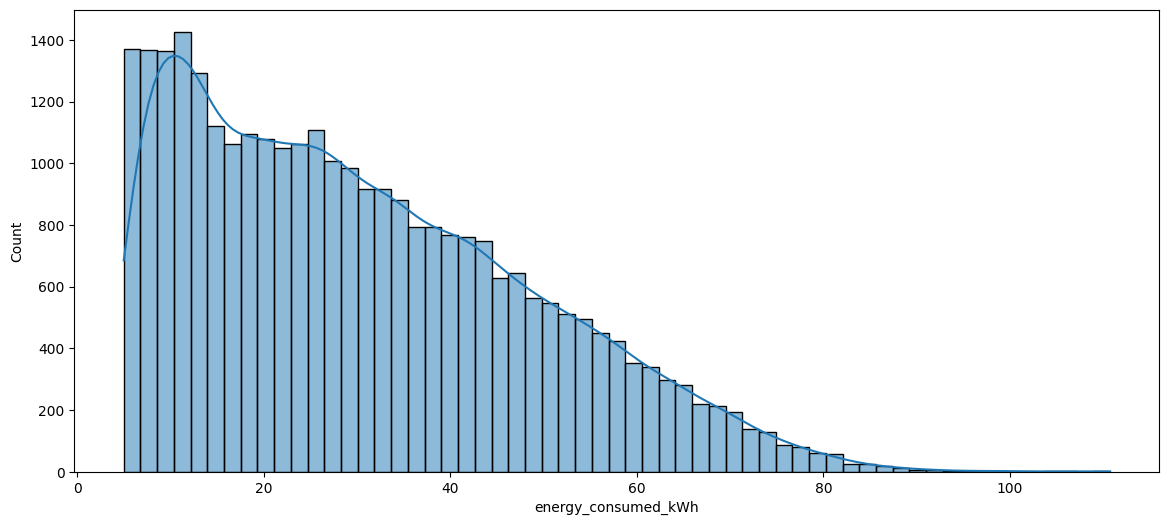

In [93]:
fig1 = plt.figure(figsize=(14, 6))
sns.histplot(data=usb_merged_data, x='energy_consumed_kWh', kde=True)
fig1.show()

Insights - Not normally distributed, left skewed.

C:\Users\Kaustubh\AppData\Local\Temp\ipykernel_2840\4245548317.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


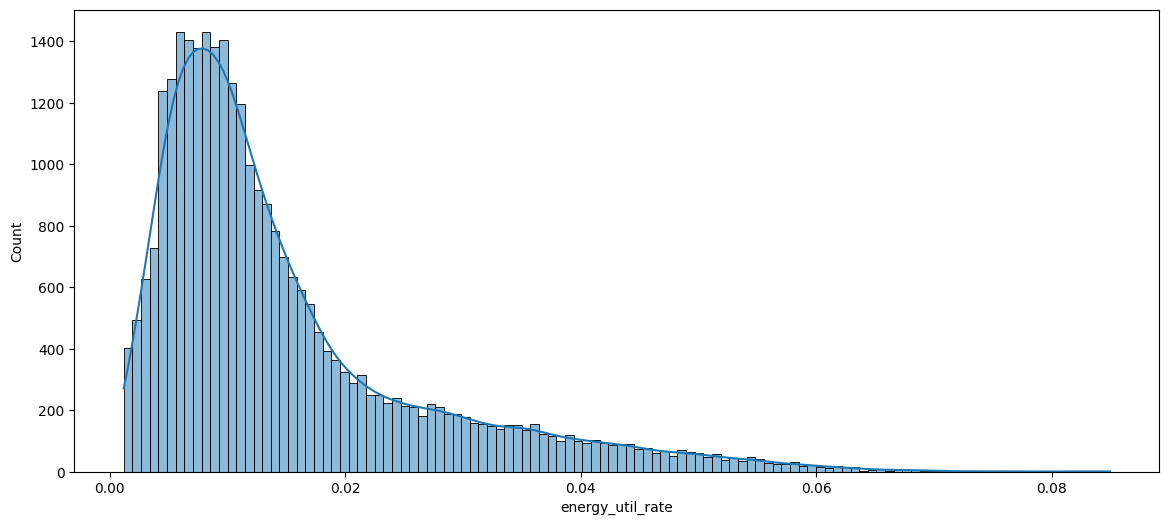

In [94]:
fig2 = plt.figure(figsize=(14, 6))
sns.histplot(data=usb_merged_data, x='energy_util_rate', kde=True)
fig2.show()

Left skewed, not normally distributed

C:\Users\Kaustubh\AppData\Local\Temp\ipykernel_2840\1946309741.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig3.show()


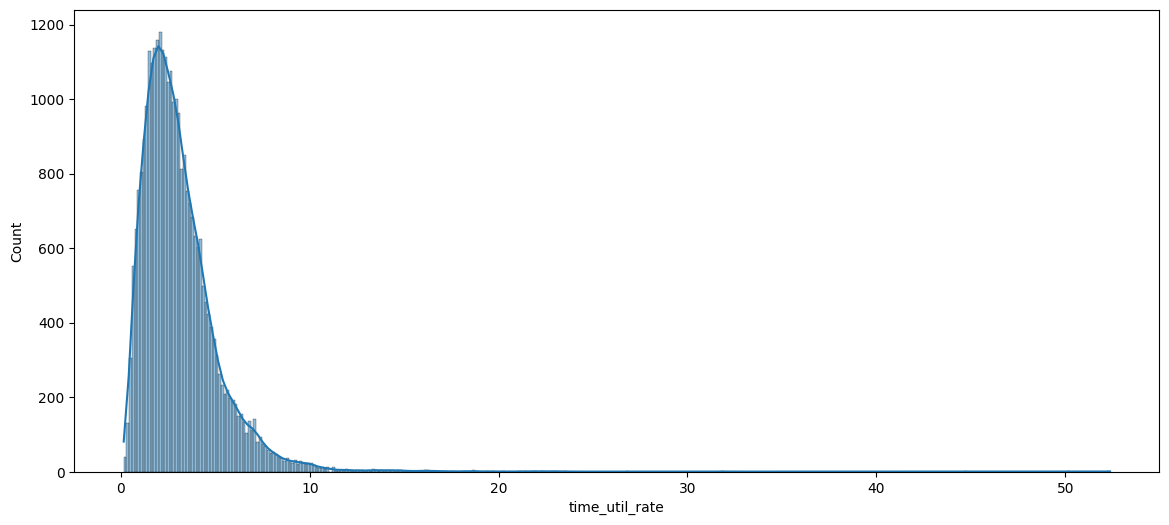

In [95]:
fig3 = plt.figure(figsize=(14, 6))
sns.histplot(data=usb_merged_data, x='time_util_rate', kde=True)
fig3.show()

Not normally distributed, left skewed.

C:\Users\Kaustubh\AppData\Local\Temp\ipykernel_2840\1123420364.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig4.show()


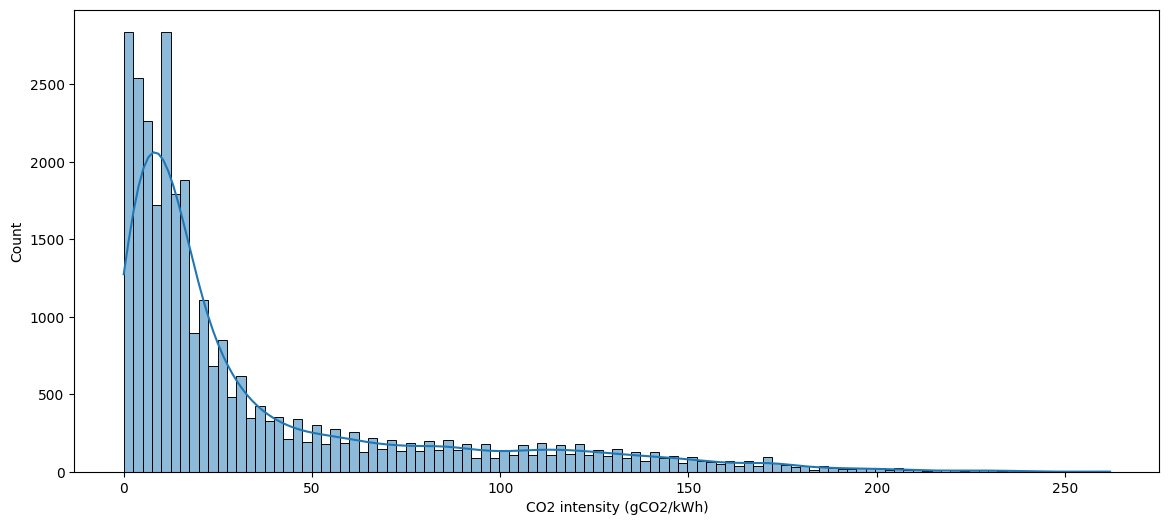

In [96]:
fig4 = plt.figure(figsize=(14, 6))
sns.histplot(data=usb_merged_data, x='CO2 intensity (gCO2/kWh)', kde=True)
fig4.show()

All the four graphs above are not normally distributed, which is expected from a real-time data. All are left-skewed. Other parameters are derived from other parameters hence, they will resemble one of these four frequency distributions.

## 4. Data Division (Based on energy levels)

As we can recall in the Power Allocation section, the power levels were assigned to the data referred from the charging operator. Now the data will be extracted seperately to understand the insights from different chargers.

In [97]:
usb_175_data = usb_merged_data[usb_merged_data['power_upto_kW'] == 175]

In [98]:
usb_175_data.head()

,id,authId,chargerId,authType,sessionStart,sessionStop,connectorType,energy_consumed_kWh,duration(hrs),duration(mins),...,power_upto_kW,energy_util_rate,energy_util_rate_percent,amount_gbp,avg_power(kWh/h),CO2 intensity (gCO2/kWh),Month,Day,Season,Hour
0,1ff7bb21-86f6-4a58-9713-63c9551b0dc3,1062232,5000198,CUSTOMER,2021-03-18 17:39:36,2021-03-18 17:59:06,CCS,9.509,0.325000,19.500000,...,175,0.002264,0.226405,6.56121,29.258462,60,March,Thursday,Spring,17
3,707dbb44-cb45-4cea-ab86-dec7c06d6a43,1073736,5000198,CUSTOMER,2021-03-18 21:23:07,2021-03-18 21:47:35,CCS,18.428,0.407778,24.466667,...,175,0.004388,0.438762,12.71532,45.191281,56,March,Thursday,Spring,21
7,6e54ee4e-fdaf-41ca-bf7c-2a1b86f19237,18605207,5000199,CHARGE_CARD,2021-03-19 10:29:46,2021-03-19 11:20:35,CCS,14.223,0.846944,50.816667,...,175,0.003386,0.338643,9.81387,16.793309,135,March,Friday,Spring,10
9,b4caeaef-bbe8-4ed1-8bbc-e8fb1bf29a39,1073736,5000199,CUSTOMER,2021-03-19 11:57:53,2021-03-19 12:28:38,CCS,13.226,0.512500,30.750000,...,175,0.003149,0.314905,9.12594,25.806829,128,March,Friday,Spring,11
13,55d361b1-506c-47dd-8105-60d180d51b8b,1073736,5000198,CUSTOMER,2021-03-19 21:02:26,2021-03-19 21:32:09,CCS,13.197,0.495278,29.716667,...,175,0.003142,0.314214,9.10593,26.645653,137,March,Friday,Spring,21


In [99]:
usb_175_data['power_upto_kW'].value_counts()

power_upto_kW
175    14327
Name: count, dtype: int64

In [100]:
usb_50_ccs_data = usb_merged_data[(usb_merged_data['connectorType'] == 'CCS') & (usb_merged_data['power_upto_kW'] == 50)]

In [101]:
usb_50_ccs_data.head()

,id,authId,chargerId,authType,sessionStart,sessionStop,connectorType,energy_consumed_kWh,duration(hrs),duration(mins),...,power_upto_kW,energy_util_rate,energy_util_rate_percent,amount_gbp,avg_power(kWh/h),CO2 intensity (gCO2/kWh),Month,Day,Season,Hour
19,ee36f82c-2ab4-4b15-9d3e-cb9de1f0af45,2369868,5000197,ANONYMOUS,2021-03-20 16:38:07,2021-03-20 17:23:54,CCS,13.848,0.763056,45.783333,...,50,0.011540,1.154000,9.55512,18.148089,31,March,Saturday,Spring,16
20,425734f4-cf3c-40ce-a56d-be9dda9a61a4,1071861,5000195,CUSTOMER,2021-03-20 17:40:19,2021-03-20 18:00:55,CCS,16.851,0.343333,20.600000,...,50,0.014042,1.404250,11.62719,49.080583,32,March,Saturday,Spring,17
27,50323eb8-5bc9-4725-9d50-41b0889cba6a,1076979,5000197,CUSTOMER,2021-03-21 08:17:00,2021-03-21 08:52:07,CCS,17.678,0.585278,35.116667,...,50,0.014732,1.473167,12.19782,30.204461,63,March,Sunday,Spring,8
28,9917c25e-3e7f-4b68-bdea-efab6ba00897,1076979,5000197,CUSTOMER,2021-03-21 10:02:00,2021-03-21 11:32:32,CCS,18.411,1.508889,90.533333,...,50,0.015343,1.534250,12.70359,12.201694,71,March,Sunday,Spring,10
37,ede73a66-abf8-40cb-b47d-62c8cc1b40e2,2382567,5000196,ANONYMOUS,2021-03-22 13:06:25,2021-03-22 13:32:49,CCS,13.493,0.440000,26.400000,...,50,0.011244,1.124417,9.31017,30.665909,73,March,Monday,Spring,13


In [102]:
usb_chademo_data = usb_merged_data[usb_merged_data['connectorType']=='CHADEMO']

In [103]:
usb_chademo_data.head()

,id,authId,chargerId,authType,sessionStart,sessionStop,connectorType,energy_consumed_kWh,duration(hrs),duration(mins),...,power_upto_kW,energy_util_rate,energy_util_rate_percent,amount_gbp,avg_power(kWh/h),CO2 intensity (gCO2/kWh),Month,Day,Season,Hour
1,4ec4bf07-f359-4199-93d3-ec842a450cfa,1056758,5000194,CUSTOMER,2021-03-18 19:00:16,2021-03-18 19:33:43,CHADEMO,6.566,0.557500,33.450000,...,50,0.005472,0.547167,4.53054,11.777578,66,March,Thursday,Spring,19
2,63ef2126-e813-4225-982d-fcd89108f2ba,1076569,5000197,CUSTOMER,2021-03-18 20:43:25,2021-03-18 21:07:50,CHADEMO,13.882,0.406944,24.416667,...,50,0.011568,1.156833,9.57858,34.112765,71,March,Thursday,Spring,20
4,55a243f9-6c3a-4a53-a964-fc7f3d88ddb7,1073736,5000197,CUSTOMER,2021-03-18 22:24:24,2021-03-18 23:09:28,CHADEMO,12.836,0.751111,45.066667,...,50,0.010697,1.069667,8.85684,17.089349,46,March,Thursday,Spring,22
5,7044201b-713f-48cc-82a5-b2eaed96ca4d,1053468,5000194,CUSTOMER,2021-03-19 07:14:26,2021-03-19 07:54:07,CHADEMO,14.757,0.661389,39.683333,...,50,0.012297,1.229750,10.18233,22.312138,91,March,Friday,Spring,7
6,ad121474-085d-4f7e-8edb-1f3045b3ddf5,1073736,5000194,CUSTOMER,2021-03-19 10:24:06,2021-03-19 10:51:40,CHADEMO,14.025,0.459444,27.566667,...,50,0.011687,1.168750,9.67725,30.525998,135,March,Friday,Spring,10


In [104]:
usb_merged_data['connectorType'].value_counts()

connectorType
CCS        24435
CHADEMO     4264
AC          1075
Name: count, dtype: int64

In [105]:
usb_ac_data = usb_merged_data[usb_merged_data['connectorType'] == 'AC']

In [106]:
usb_ac_data.head()

,id,authId,chargerId,authType,sessionStart,sessionStop,connectorType,energy_consumed_kWh,duration(hrs),duration(mins),...,power_upto_kW,energy_util_rate,energy_util_rate_percent,amount_gbp,avg_power(kWh/h),CO2 intensity (gCO2/kWh),Month,Day,Season,Hour
30,1f041bfa-8676-4d5c-972c-d504c1102e9b,2377311,5000194,ANONYMOUS,2021-03-21 16:17:34,2021-03-21 18:01:23,AC,11.889,1.730278,103.816667,...,38,0.013036,1.303618,8.20341,6.871151,99,March,Sunday,Spring,16
80,5f62e38a-3e42-4279-837e-b7e3032b5221,2411950,5000194,ANONYMOUS,2021-03-26 21:36:41,2021-03-27 00:14:24,AC,29.022,2.628611,157.716667,...,38,0.031822,3.182237,20.02518,11.040812,32,March,Friday,Spring,21
85,22631343-89d1-4f10-bd14-020129927f2f,2415562,5000195,ANONYMOUS,2021-03-27 12:49:39,2021-03-27 13:37:57,AC,12.481,0.805000,48.300000,...,38,0.013685,1.368531,8.61189,15.504348,32,March,Saturday,Spring,12
102,0b39dd53-569a-417f-9d78-8b171ba075b5,2433911,5000194,ANONYMOUS,2021-03-30 06:45:02,2021-03-30 12:08:05,AC,56.337,5.384167,323.050000,...,38,0.061773,6.177303,38.87253,10.463458,25,March,Tuesday,Spring,6
112,66b1be04-16ee-4b73-80d6-e83c1151fe38,2441591,5000194,ANONYMOUS,2021-03-31 11:53:33,2021-03-31 13:00:07,AC,7.817,1.109444,66.566667,...,38,0.008571,0.857127,5.39373,7.045869,99,March,Wednesday,Spring,11


In [107]:
usb_ac_data['power_upto_kW'].value_counts()

power_upto_kW
38    1075
Name: count, dtype: int64

Now that we have got different dataframes for each type of power level, let's understand their statistical distribution of energy consumption.

<Axes: xlabel='energy_consumed_kWh', ylabel='Count'>

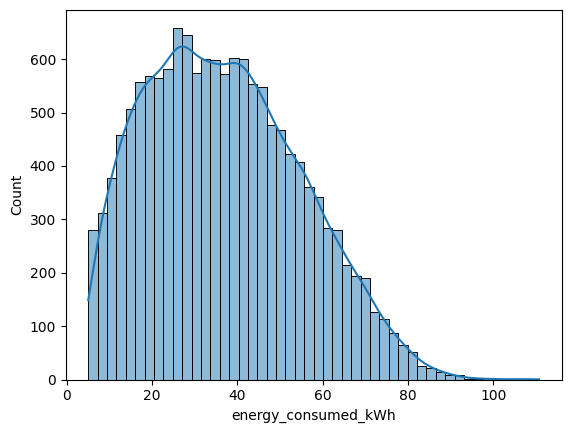

In [108]:
fig5 = plt.figure()
sns.histplot(data=usb_175_data, x='energy_consumed_kWh', kde=True)

<Axes: xlabel='energy_consumed_kWh', ylabel='Count'>

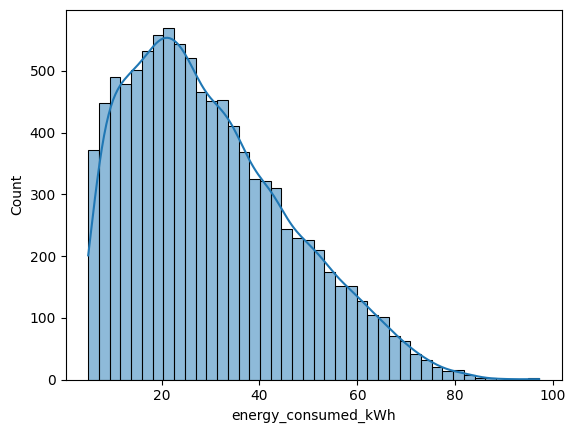

In [109]:
fig6 = plt.figure()
sns.histplot(data=usb_50_ccs_data, x='energy_consumed_kWh', kde=True)

<Axes: xlabel='energy_consumed_kWh', ylabel='Count'>

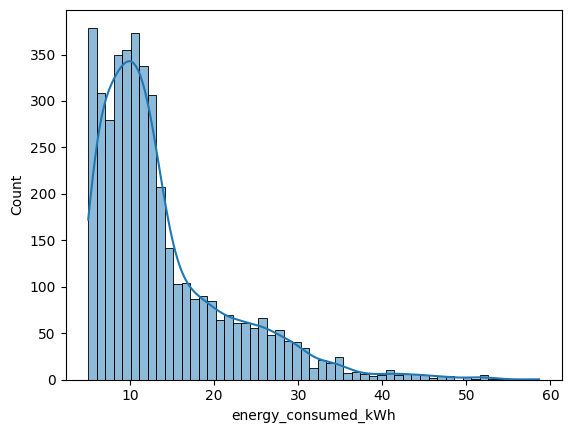

In [110]:
fig7 = plt.figure()
sns.histplot(data=usb_chademo_data, x='energy_consumed_kWh', kde=True)

<Axes: xlabel='energy_consumed_kWh', ylabel='Count'>

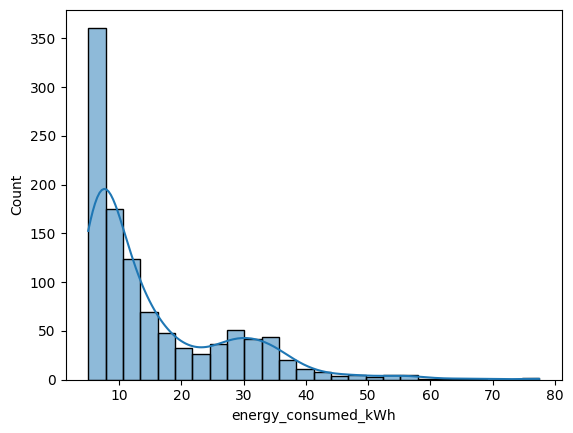

In [111]:
fig8 = plt.figure()
sns.histplot(data=usb_ac_data, x='energy_consumed_kWh', kde=True)

In [117]:
usb_merged_data.columns

Index(['id', 'authId', 'chargerId', 'authType', 'sessionStart', 'sessionStop',
       'connectorType', 'energy_consumed_kWh', 'duration(hrs)',
       'duration(mins)', 'time_util_rate', 'power_upto_kW', 'energy_util_rate',
       'energy_util_rate_percent', 'amount_gbp', 'avg_power(kWh/h)',
       'CO2 intensity (gCO2/kWh)', 'Month', 'Day', 'Season', 'Hour'],
      dtype='object')

## 5. Correlation analysis:

In [127]:
numerical_cols = ['energy_consumed_kWh', 'duration(hrs)',
       'duration(mins)', 'time_util_rate', 'energy_util_rate',
       'energy_util_rate_percent', 'amount_gbp', 'avg_power(kWh/h)',
       'CO2 intensity (gCO2/kWh)']

In [128]:
correlation_matrix = usb_merged_data[numerical_cols].corr()

In [129]:
print(correlation_matrix)

                          energy_consumed_kWh  duration(hrs)  duration(mins)  \
energy_consumed_kWh                  1.000000       0.411375        0.411375   
duration(hrs)                        0.411375       1.000000        1.000000   
duration(mins)                       0.411375       1.000000        1.000000   
time_util_rate                       0.411375       1.000000        1.000000   
energy_util_rate                     0.531126       0.593252        0.593252   
energy_util_rate_percent             0.531126       0.593252        0.593252   
amount_gbp                           1.000000       0.411375        0.411375   
avg_power(kWh/h)                     0.457429      -0.380595       -0.380595   
CO2 intensity (gCO2/kWh)            -0.028534       0.048415        0.048415   

                          time_util_rate  energy_util_rate  \
energy_consumed_kWh             0.411375          0.531126   
duration(hrs)                   1.000000          0.593252   
duration(mins

<Axes: >

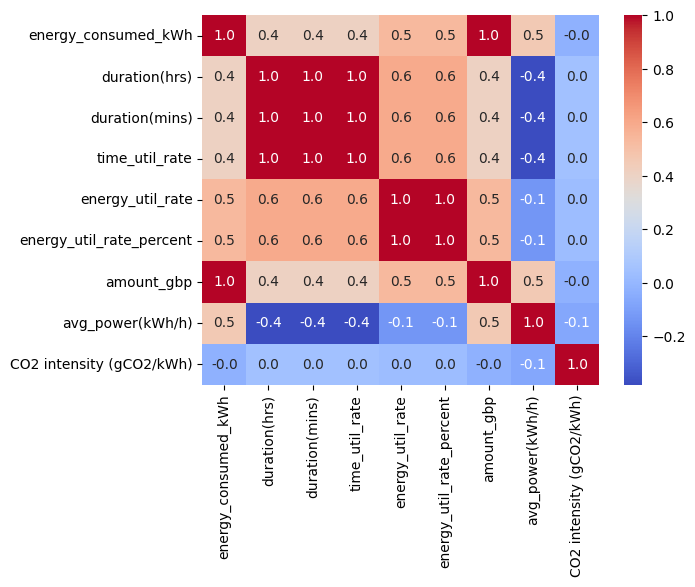

In [130]:
fig9 = plt.figure()
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm')

## Data Exporting

In [114]:
# usb_merged_data.to_csv("../data/merged_data/usb_ev_merged_data.csv", index=False)